<a href="https://colab.research.google.com/github/daniel-usp/risco/blob/main/EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


#Inserir os tickers conforme o Yahoo Finance
TickerA='PETR4.SA'
TickerB='CIEL3.SA'
TickerC = 'IRBR3.SA'
TickerD = 'COGN3.SA'
TickerE = 'VALE3.SA'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC, TickerD,TickerE] #Não se deve esquecer de completar a lista 
for t in tickers:
  data = yf.Ticker(t)
  prices[t]= data.history(period="3y")['Close'].dropna()
prices


,PETR4.SA,CIEL3.SA,IRBR3.SA,COGN3.SA,VALE3.SA
Date,,,,,
2019-05-17,17.757835,5.996014,29.121830,8.718043,36.527702
2019-05-20,18.362238,6.092441,30.500362,8.995436,35.785210
2019-05-21,19.060175,6.215167,30.409628,9.411524,36.290409
2019-05-22,18.987951,6.399255,30.210606,9.436973,36.328682
2019-05-23,18.662939,6.574577,30.087679,9.566520,36.604252
...,...,...,...,...,...
2022-05-11,33.570000,3.060000,2.540000,2.380000,78.690002
2022-05-12,33.830002,3.180000,2.600000,2.610000,77.900002
2022-05-13,34.270000,3.250000,2.610000,2.550000,77.809998


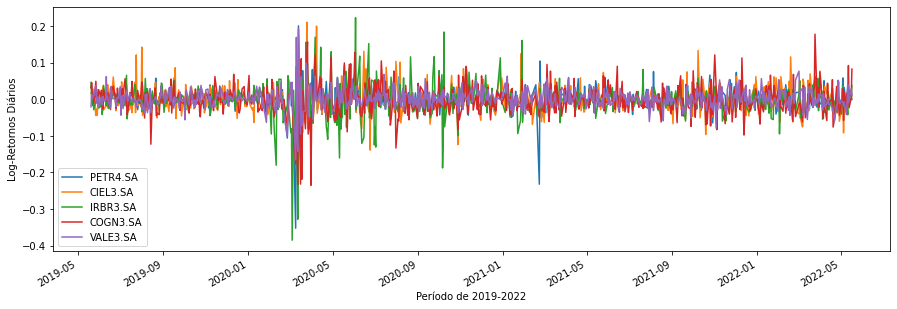

In [9]:
log_returns=np.log(prices).diff()
log_returns.plot(figsize=(15,5))
plt.ylabel('Log-Retornos Diários')
plt.xlabel('Período de 2019-2022')
plt.show()

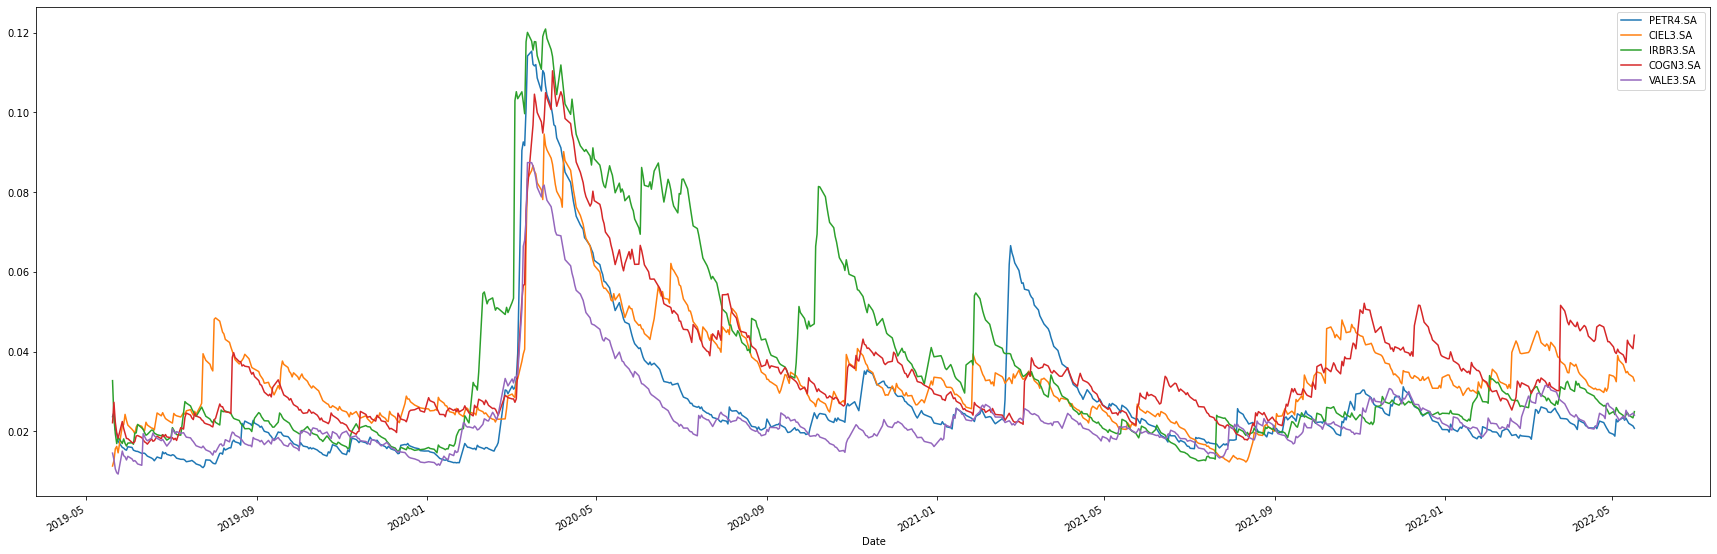

In [52]:

log_returns.fillna(0, inplace = True)
vol_EWMA = (log_returns.ewm(alpha = 0.06, adjust = False).std())
vol_EWMA.plot(figsize = (30,10))


